In [80]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
value = [1, 2, 3, 4, 5, 6, 7, 8,10]


In [3]:
grid = np.array([[value[0], value[1], value[2]], [value[3], value[4], value[5]], [value[6],value[7],value[8]]])
print(grid)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]


Best way of doing this: 


In [4]:
grid = np.array(value).reshape((3,3))
print(grid)

print(np.mean(grid, axis =1))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
[2.         5.         8.33333333]


In [5]:
df = pd.read_csv('./Demographic-Data-Analyzer/adult.data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
race_count = pd.Series(df['race'].value_counts())
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [7]:
round(df['age'].loc[df['sex'] == 'Male'].mean(),1)

39.4

In [8]:
df['education'].loc[df['education'] == 'Bachelors'].value_counts()

Bachelors    5355
Name: education, dtype: int64

In [9]:
df['education'].value_counts().sum()

32561

In [10]:
df['education'].loc[df['education'] == 'Bachelors'].value_counts() / df['education'].value_counts().sum()

Bachelors    0.164461
Name: education, dtype: float64

In [11]:
df['education'].loc[df['education'] == 'Bachelors'].count() / df['education'].count().sum()

0.16446055096587942

In [12]:
round(df['education'].loc[df['education'] == 'Bachelors'].count() / df['education'].count().sum()*100,1)

16.4

In [13]:
maskhi = df['education'].isin(['Bachelors', 'Doctorate', 'Masters'])
masklo = ~df['education'].isin(['Bachelors', 'Doctorate', 'Masters'])
df['salary'][masklo].count()


25070

In [14]:
df['salary'][maskhi].count()

7491

In [15]:
4335 / 20715

0.20926864590876176

In [16]:
df['salary'][maskhi].value_counts().sum()

7491

In [17]:
df['salary'][maskhi].value_counts().sum()

7491

In [18]:
df['salary'][maskhi].loc[df['salary'] == '>50K'].value_counts().divide(df['salary'][maskhi].value_counts().sum()) 

>50K    0.465358
Name: salary, dtype: float64

In [19]:
np.round(df['salary'][maskhi].loc[df['salary'] == '>50K'].count() / df['salary'][maskhi].count().sum()*100,1)

46.5

In [20]:
df['salary'][masklo].loc[df['salary'] == '>50K'].value_counts().divide(df['salary'][masklo].value_counts().sum()) 

>50K    0.173714
Name: salary, dtype: float64

In [21]:
df['salary'][masklo].loc[df['salary'] == '>50K'].count() / df['salary'][masklo].count().sum()

0.173713601914639

In [22]:
df['hours-per-week'].min()

1

In [23]:
# maskminhour = df[['hours-per-week'] == df['hours-per-week'].min()]
# maskminhour
maskminhour = df['hours-per-week'] == df['hours-per-week'].min()


In [24]:
df[['hours-per-week']][maskminhour].count()

hours-per-week    20
dtype: int64

In [25]:
df['salary'][maskminhour].loc[df['salary'] == '>50K'].count()

2

In [26]:
df['salary'][maskminhour].count()

20

In [27]:
rich_percentage = int(df['salary'][maskminhour].loc[df['salary'] == '>50K'].count() / df['salary'][maskminhour].count()*100)
rich_percentage

10

In [28]:
int(df['salary'][maskminhour].loc[
        df['salary'] == '>50K'].count() / df['salary'][maskminhour].count()*100)

10

In [29]:
df.groupby(['native-country']).count().head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
native-country,,,,,,,,,,,,,,
?,583,583,583,583,583,583,583,583,583,583,583,583,583,583
Cambodia,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Canada,121,121,121,121,121,121,121,121,121,121,121,121,121,121
China,75,75,75,75,75,75,75,75,75,75,75,75,75,75
Columbia,59,59,59,59,59,59,59,59,59,59,59,59,59,59


In [30]:
df.loc[df['native-country'] == '?'].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K


In [31]:
df.loc[df['salary'] == '>50K'].groupby(['native-country']).count().sort_values('salary', ascending=False)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
native-country,,,,,,,,,,,,,,
United-States,7171,7171,7171,7171,7171,7171,7171,7171,7171,7171,7171,7171,7171,7171
?,146,146,146,146,146,146,146,146,146,146,146,146,146,146
Philippines,61,61,61,61,61,61,61,61,61,61,61,61,61,61
Germany,44,44,44,44,44,44,44,44,44,44,44,44,44,44
India,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Canada,39,39,39,39,39,39,39,39,39,39,39,39,39,39
Mexico,33,33,33,33,33,33,33,33,33,33,33,33,33,33
England,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Italy,25,25,25,25,25,25,25,25,25,25,25,25,25,25


In [32]:
df.loc[df['salary'] == '>50K'].groupby(['native-country']).count()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
native-country,,,,,,,,,,,,,,
?,146,146,146,146,146,146,146,146,146,146,146,146,146,146
Cambodia,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Canada,39,39,39,39,39,39,39,39,39,39,39,39,39,39
China,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Columbia,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Cuba,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Dominican-Republic,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Ecuador,4,4,4,4,4,4,4,4,4,4,4,4,4,4
El-Salvador,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [33]:
maskgroup = df.loc[df['salary'] == '>50K'].groupby(['native-country']).count()
maskgroup.loc[maskgroup['age'] == maskgroup['age'].max()]['age']

native-country
United-States    7171
Name: age, dtype: int64

In [34]:
# Correct version
maskrichhi = df.loc[df['salary'] == '>50K'].groupby(['native-country']).count()['age']
maskgroupall = df.groupby(['native-country']).count()['age']
earn_rich_percent_country = maskrichhi / maskgroupall
print(earn_rich_percent_country.idxmax(), ':', round(earn_rich_percent_country.max()*100,1))


Iran : 41.9


In [35]:
top_ocup = df.loc[(df['salary'] == '>50K') & (df['native-country'] == 'India')].groupby(['occupation']).count().idxmax()[0]
top_ocup

'Prof-specialty'


# Example of Masking
import pandas as pd

values = [1, 2, 3, 4]
series = pd.Series([0, 1, 2, 3, 4, 5])

mask = series.isin(values)
result = series[mask]

print(result)


import pandas as pd

df = pd.DataFrame({'item': ['apple', 'banana', 'cherry', 'date'],'price': [1, 2, 3, 4]})

max_index = df['price'].idxmax()
print(max_index)


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [37]:
df = pd.read_csv('Sea-Level-Predictor/epa-sea-level.csv')




In [38]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [39]:
df.count()

Year                        134
CSIRO Adjusted Sea Level    134
Lower Error Bound           134
Upper Error Bound           134
NOAA Adjusted Sea Level      21
dtype: int64

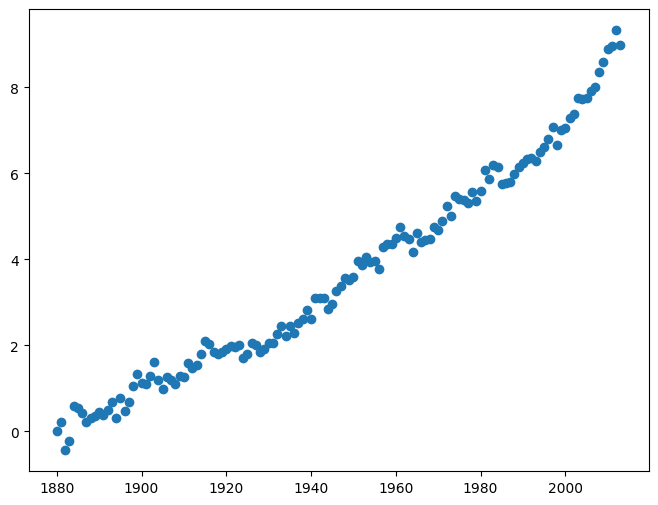

In [40]:
# Create scatter plot
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.show()

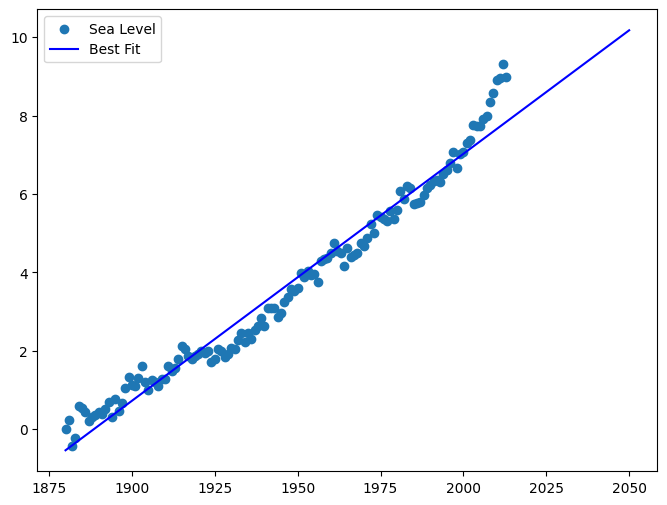

In [41]:
# Create first line of best fit
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label= 'Sea Level')
slope, intercept, r, p, se = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
fit_x1 = pd.Series([df['Year'].min(), 2050])
fit_y1 = slope * fit_x1 + intercept
axes.plot(fit_x1, fit_y1, label= 'Best Fit',color= 'b')
plt.legend()
plt.show()

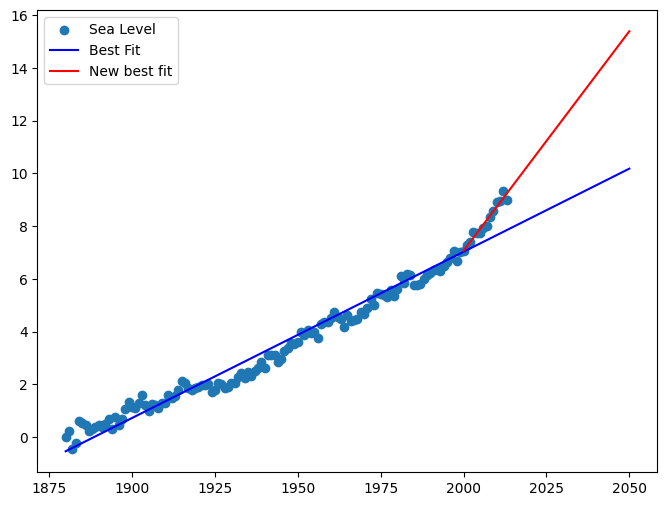

In [42]:
# Create second line of best fit
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label= 'Sea Level')
slope, intercept, r, p, se = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
fit_x1 = pd.Series([df['Year'].min(), 2050])
fit_y1 = slope * fit_x1 + intercept
axes.plot(fit_x1, fit_y1, label= 'Best Fit',color= 'b')
slope_2, intercept_2, r_2, p_2, se_2 = linregress(
    df['Year'].loc[df['Year'] > 2000], 
    df['CSIRO Adjusted Sea Level'].loc[df['Year'] > 2000])
fit_x2 = pd.Series([2000,2050])
fit_y2 = slope_2 * fit_x2 + intercept_2
axes.plot(fit_x2, fit_y2, label= 'New best fit', color='r')
plt.legend()
plt.show()

In [43]:
df[['Year', 'CSIRO Adjusted Sea Level']][df['Year'] > 2000]

,Year,CSIRO Adjusted Sea Level
121,2001,7.287402
122,2002,7.381890
123,2003,7.759843
124,2004,7.740157
125,2005,7.744094
126,2006,7.917323
127,2007,7.996063
128,2008,8.350394
129,2009,8.586614
130,2010,8.901575


In [44]:
df[['Year', 'CSIRO Adjusted Sea Level']].loc[df['Year'] > 2000]

,Year,CSIRO Adjusted Sea Level
121,2001,7.287402
122,2002,7.381890
123,2003,7.759843
124,2004,7.740157
125,2005,7.744094
126,2006,7.917323
127,2007,7.996063
128,2008,8.350394
129,2009,8.586614
130,2010,8.901575


In [45]:
# Add labels and title


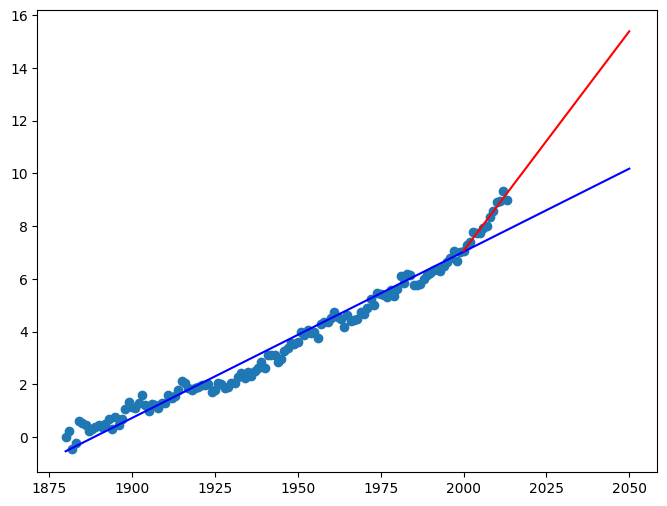

In [46]:
# Create second line of best fit
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label= 'Sea Level')
slope, intercept, r, p, se = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
fit_x1 = pd.Series([df['Year'].min(), 2050])
fit_y1 = slope * fit_x1 + intercept
axes.plot(fit_x1, fit_y1, label= 'Best Fit',color= 'b')
slope_2, intercept_2, r_2, p_2, se_2 = linregress(
    df['Year'].loc[df['Year'] > 2000], 
    df['CSIRO Adjusted Sea Level'].loc[df['Year'] > 2000])
fit_x2 = pd.Series([2000,2050])
fit_y2 = slope_2 * fit_x2 + intercept_2
axes.plot(fit_x2, fit_y2, label= 'New best fit', color='r')


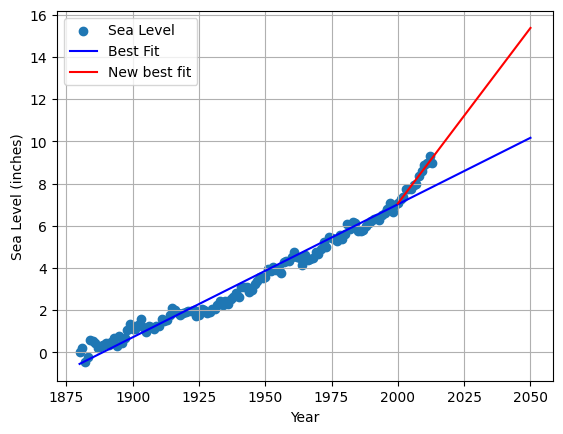

In [47]:
# Create second line of best fit
fig, axes = plt.subplots()
axes.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label= 'Sea Level')
slope, intercept, r, p, se = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
fit_x1 = pd.Series([df['Year'].min(), 2050])
fit_y1 = slope * fit_x1 + intercept
axes.plot(fit_x1, fit_y1, label= 'Best Fit',color= 'b')
slope_2, intercept_2, r_2, p_2, se_2 = linregress(
    df['Year'].loc[df['Year'] >= 2000], 
    df['CSIRO Adjusted Sea Level'].loc[df['Year'] >= 2000])
fit_x2 = pd.Series([2000,2050])
fit_y2 = slope_2 * fit_x2 + intercept_2
axes.plot(fit_x2, fit_y2, label= 'New best fit', color='r')
plt.ylabel('Sea Level (inches)') 
plt.xlabel('Year')
plt.legend()
plt.grid()

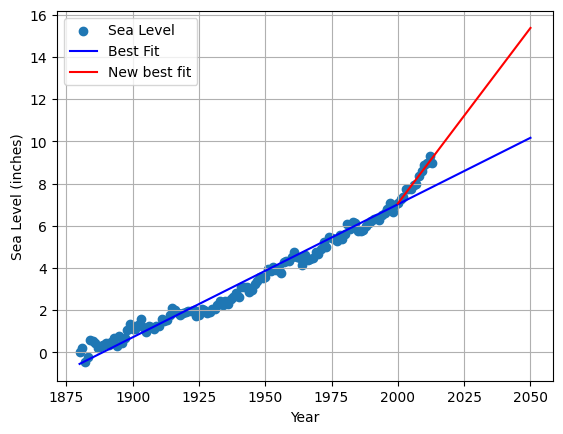

In [48]:
# Create second line of best fit
fig, axes = plt.subplots()
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label= 'Sea Level')
slope, intercept, r, p, se = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
fit_x1 = pd.Series([df['Year'].min(), 2050])
fit_y1 = slope * fit_x1 + intercept
plt.plot(fit_x1, fit_y1, label= 'Best Fit',color= 'b')
slope_2, intercept_2, r_2, p_2, se_2 = linregress(
    df['Year'].loc[df['Year'] >= 2000], 
    df['CSIRO Adjusted Sea Level'].loc[df['Year'] >= 2000])
fit_x2 = pd.Series([2000,2050])
fit_y2 = slope_2 * fit_x2 + intercept_2
plt.plot(fit_x2, fit_y2, label= 'New best fit', color='r')
plt.ylabel('Sea Level (inches)') 
plt.xlabel('Year')
plt.legend()
plt.grid()

In [49]:
print(slope, intercept, r, p, se)
print(slope_2, intercept_2, r_2, p_2, se_2)
print(df['Year'].min())

0.06304458401213482 -119.06594196773983 0.984757131182585 3.788696979113155e-102 0.0009692118713287152
0.1664272733318682 -325.7934668059649 0.9762875716140618 2.4388064141618245e-09 0.010652933111541163
1880


In [50]:
df.shape

(134, 5)

In [51]:
df['Year'].min()

1880

In [52]:
df['Year'] [df['Year'] >= 2000]


120    2000
121    2001
122    2002
123    2003
124    2004
125    2005
126    2006
127    2007
128    2008
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, dtype: int64

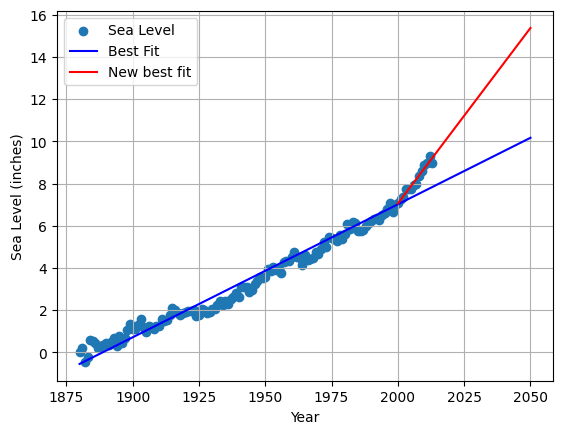

In [53]:
# Create second line of best fit
fig, axes = plt.subplots()
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
axes.scatter(x, y, label= 'Sea Level')
slope, intercept, r, p, se = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
# fit_x1 = df['Year'].copy()
# fit_x1 = fit_x1.append(pd.Series([2050])) 
fit_x1 = pd.Series([i for i in range(1880, 2051)])
fit_y1 = slope * fit_x1 + intercept
plt.plot(fit_x1, fit_y1, label= 'Best Fit',color= 'b')
slope_2, intercept_2, r_2, p_2, se_2 = linregress(
    df['Year'].loc[df['Year'] >= 2000], 
    df['CSIRO Adjusted Sea Level'].loc[df['Year'] >= 2000])
# fit_x2 = df['Year'][df['Year'] >= 2000].copy()
# fit_x2 = fit_x2.append(pd.Series([2050]))
fit_x2 = pd.Series([i for i in range(2000, 2051)])
fit_y2 = slope_2 * fit_x2 + intercept_2
plt.plot(fit_x2, fit_y2, label= 'New best fit', color='r')
plt.ylabel('Sea Level (inches)') 
plt.xlabel('Year')
plt.legend()
plt.grid()

In [54]:
print(fit_x1)

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
166    2046
167    2047
168    2048
169    2049
170    2050
Length: 171, dtype: int64


# Medical Data

In [55]:
import seaborn as sns

In [56]:
df_health = pd.read_csv('Medical-Data-Visualizer/medical_examination.csv')
df_health.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [57]:
# Transform centimeters into meters
df_health['height'] = df_health['height'] / 100
df_health['height']

0        1.68
1        1.56
2        1.65
3        1.69
4        1.56
         ... 
69995    1.68
69996    1.58
69997    1.83
69998    1.63
69999    1.70
Name: height, Length: 70000, dtype: float64

In [58]:
np.power(df_health['height'],2)

0        2.8224
1        2.4336
2        2.7225
3        2.8561
4        2.4336
          ...  
69995    2.8224
69996    2.4964
69997    3.3489
69998    2.6569
69999    2.8900
Name: height, Length: 70000, dtype: float64

In [59]:
# Create the BMI column
df_health['bmi'] = df_health['weight'] / np.power(df_health['height'],2)


In [60]:
# Create and fill the overweight column
df_health.loc[df_health['bmi'] > 25, 'overweight'] = 1
df_health.loc[df_health['bmi'] <= 25, 'overweight'] = 0

In [61]:
# Normalize the data in the cholesterol and gluc columns
df_health.loc[df_health['cholesterol'] == 1, 'cholesterol'] = 0
df_health.loc[df_health['gluc'] == 1, 'gluc'] = 0
df_health.loc[df_health['cholesterol'] > 1, 'cholesterol'] = 1
df_health.loc[df_health['gluc'] > 1, 'gluc'] = 1

In [62]:
# Melt the data and transform it into long format
columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
melted_df_health = df_health.melt(id_vars='cardio', value_vars=columns)
melted_df_health.head(20)

,cardio,variable,value
0,0,cholesterol,0.0
1,1,cholesterol,1.0
2,1,cholesterol,1.0
3,1,cholesterol,0.0
4,0,cholesterol,0.0
5,0,cholesterol,1.0
6,0,cholesterol,1.0
7,1,cholesterol,1.0
8,0,cholesterol,0.0
9,0,cholesterol,0.0


In [63]:
# Group the data
agg_melted_df_health = melted_df_health.groupby(
    ['cardio', 'variable']).value_counts().reset_index().rename(columns={0:'count'})
agg_melted_df_health.head()

,cardio,variable,value,count
0,0,active,1.0,28643
1,0,active,0.0,6378
2,0,alco,0.0,33080
3,0,alco,1.0,1941
4,0,cholesterol,0.0,29330


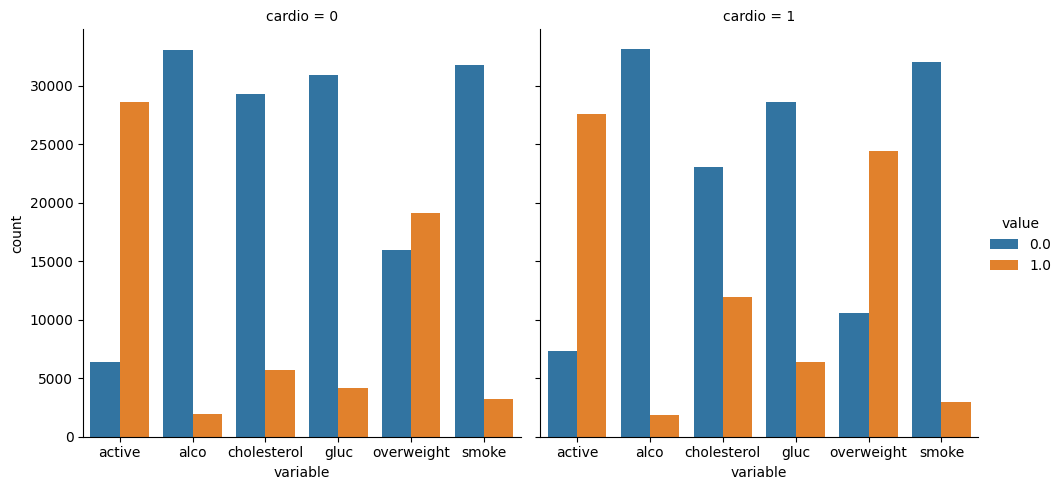

In [64]:
# Make the catplot
fig = sns.catplot(data=agg_melted_df_health, x= 'variable', y= 'count', col= 'cardio', hue= 'value',  kind= 'bar')

In [65]:
# Clean the data
filtered_df_health = df_health.loc[
                    (df_health['ap_lo'] <= df_health['ap_hi']) | 
                    (df_health['height'] >= df_health['height'].quantile(0.025)) |
                    (df_health['height'] < df_health['height'].quantile(0.975)) | 
                    (df_health['weight'] > df_health['weight'].quantile(0.025)) | 
                    (df_health['weight'] < df_health['weight'].quantile(0.975))]
filtered_df_health = filtered_df_health.drop(columns=['bmi'])
filtered_df_health.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0.0


In [66]:
# compute the correlation
corr = filtered_df_health.corr()

In [67]:
# Mask the upper triangle
mask = np.triu(np.ones_like(filtered_df_health.corr(), dtype=bool))

<AxesSubplot: >

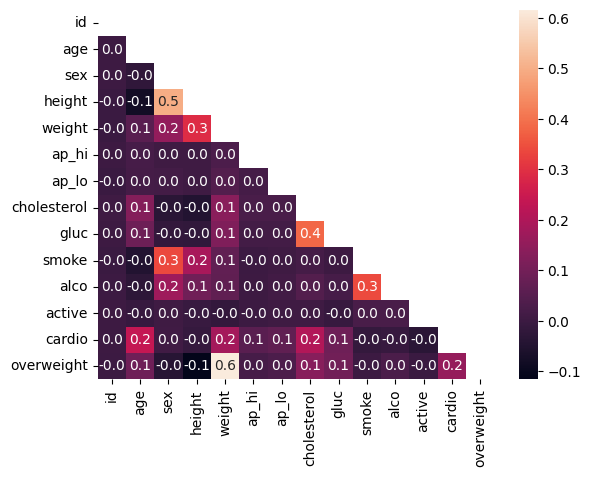

In [68]:
# Plot the heatmap
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, mask= mask, fmt= '.1f')

In [69]:
df_health.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,21.967120,0.0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,34.927679,1.0
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,23.507805,0.0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,28.710479,1.0
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,23.011177,0.0


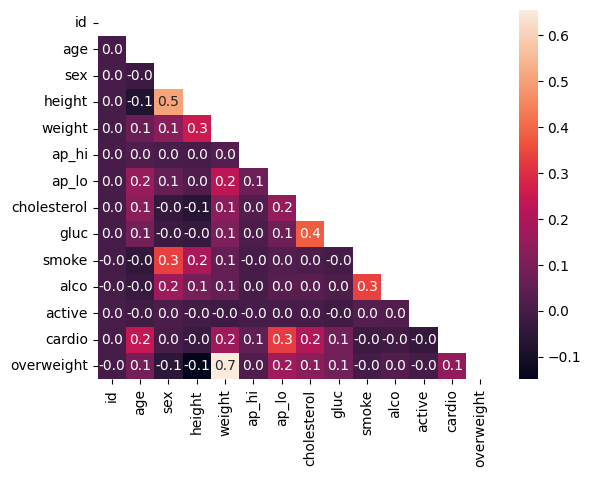

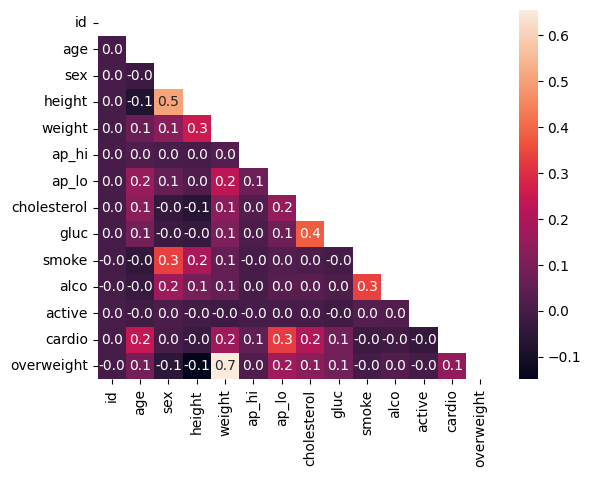

In [70]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = pd.read_csv('Medical-Data-Visualizer/medical_examination.csv')
    df_heat['bmi'] = df_heat['weight'] / ((df_heat['height'] / 100) ** 2 )
    df_heat.loc[df_heat['bmi'] > 25, 'overweight'] = 1
    df_heat.loc[df_heat['bmi'] <= 25, 'overweight'] = 0
    df_heat.loc[df_heat['cholesterol'] == 1, 'cholesterol'] = 0
    df_heat.loc[df_heat['gluc'] == 1, 'gluc'] = 0
    df_heat.loc[df_heat['cholesterol'] > 1, 'cholesterol'] = 1
    df_heat.loc[df_heat['gluc'] > 1, 'gluc'] = 1
    df_heat = df_heat.drop(columns=['bmi'])
    filtered_df_heat = df_heat.loc[
                    (df_heat['ap_lo'] <= df_heat['ap_hi'])  &
                    (df_heat['height'] >= df_heat['height'].quantile(0.025)) &
                    (df_heat['height'] <= df_heat['height'].quantile(0.975)) & 
                    (df_heat['weight'] >= df_heat['weight'].quantile(0.025)) & 
                    (df_heat['weight'] <= df_heat['weight'].quantile(0.975))]
    

    # Calculate the correlation matrix
    corr = filtered_df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(filtered_df_heat.corr(), dtype=bool))


    # Set up the matplotlib figure
    fig, ax = plt.subplots()

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, annot=True, mask= mask, fmt= '.1f')


    # Do not modify the next two lines
    return fig
draw_heat_map()


# Page View Time Series

In [71]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df_time = pd.read_csv('Page-View-Time-Series-Visualizer/fcc-forum-pageviews.csv', 
                    index_col='date', parse_dates=['date'])
df_time

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [72]:
# Clean data
df_time = df_time.loc[(df_time['value'] > df_time['value'].quantile(0.025)) &
                    (df_time['value'] < df_time['value'].quantile(0.975)) ]

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

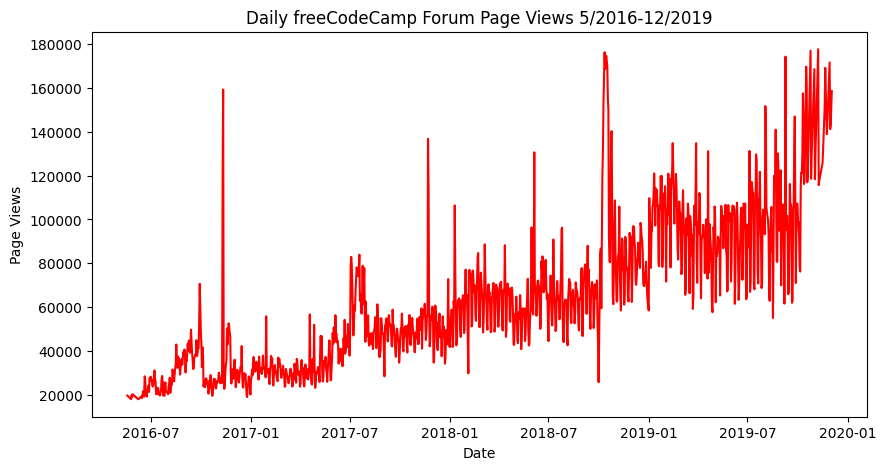

In [73]:
# Draw the line plot
fig, ax = plt.subplots(figsize=(10,5))
x = df_time.index
y = df_time['value']
ax.plot(x, y,'r')
title = 'Daily freeCodeCamp Forum Page View from ' + str((df_time.index.min())) + '-' + str(df_time.index.max())
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
# ax.set_title(title)

## Bar chart

In [74]:
df_time.index.strftime('%B')

Index(['May', 'May', 'May', 'May', 'May', 'June', 'June', 'June', 'June',
       'June',
       ...
       'November', 'November', 'November', 'November', 'November', 'November',
       'November', 'November', 'December', 'December'],
      dtype='object', name='date', length=1238)

In [75]:
df_time_2 = df_time.copy()

In [76]:
df_time_2['year'] = df_time_2.index.year 
df_time_2['month'] = df_time_2.index.month_name()
df_time_2.head()

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May


In [77]:
# fig_2, ax_2 = plt.subplots(figsize= (8,8))

# for month in df_time_2['month'].unique():
#     working_df = df_time_2.loc[df_time_2['month'] == month]
#     ax_2.bar(working_df['year'], working_df['value'], label=month)
# ax_2.set_xlabel('Year')
# ax_2.set_ylabel('Average Page Views')
# ax_2.legend(title='months')

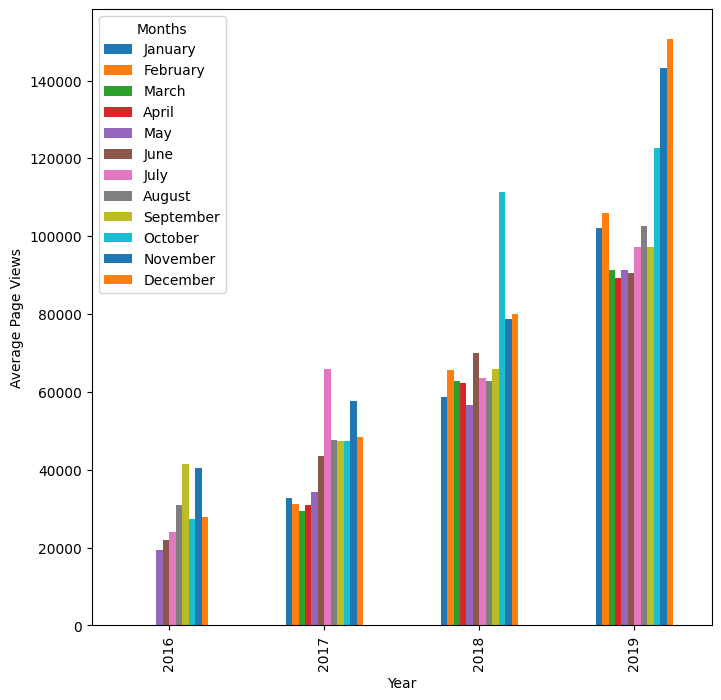

In [91]:
fig_2, ax_2 = plt.subplots(figsize= (8,8))
working_df = df_time_2.groupby(['year', 'month'])['value'].mean()
working_df = working_df.unstack(level='month')
working_df = working_df[['January', 'February', 'March', 'April', 'May', 'June', 
                        'July', 'August', 'September', 'October', 'November', 'December']]
working_df.plot.bar(ax=ax_2)
ax_2.set_xlabel('Year')
ax_2.set_ylabel('Average Page Views')
ax_2.legend(title='Months')


In [85]:
working_df.index

Int64Index([2016, 2017, 2018, 2019], dtype='int64', name='year')

In [87]:
working_df.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


## Example of an unstacked Bar plot 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame with grouped data
data = {
    'group': ['A', 'A', 'B', 'B', 'C', 'C'],
    'category': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
    'value': [10, 20, 30, 40, 50, 60]
}
df = pd.DataFrame(data)

# Pivot the data to create a table with groups as columns and categories as rows
pivot_table = df.pivot(index='category', columns='group', values='value')

# Create a bar plot with unstacked bars
ax = pivot_table.plot(kind='bar', stacked=False)

# Add labels and legend
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.legend(title='Group')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.array([1, 2, 3, 4, 5])
y1 = np.array([10, 8, 6, 4, 2])
y2 = np.array([9, 7, 5, 3, 1])

# Create figure and axis objects
fig, ax = plt.subplots()

# Define bar width and positions
bar_width = 0.4
bar_pos1 = x - bar_width/2
bar_pos2 = x + bar_width/2

# Plot the bars
ax.bar(bar_pos1, y1, width=bar_width, label='Group 1')
ax.bar(bar_pos2, y2, width=bar_width, label='Group 2')

# Set x axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E'])

# Add legend, title and axis labels
ax.legend()
ax.set_title('Separated Bar Plot')
ax.set_xlabel('Category')
ax.set_ylabel('Value')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

df_time_2 = df_time.copy()
df_time_2['year'] = df_time_2.index.year 
df_time_2['month'] = df_time_2.index.month_name()

fig_2, ax_2 = plt.subplots(figsize=(8,8))

for month in df_time_2['month'].unique():
    data = df_time_2[df_time_2['month']==month]
    ax_2.bar(data['year'], data['value'], label=month)

ax_2.set_xlabel('Year')
ax_2.set_ylabel('Average Page Views')
ax_2.legend(title='months')


## Boxplot

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

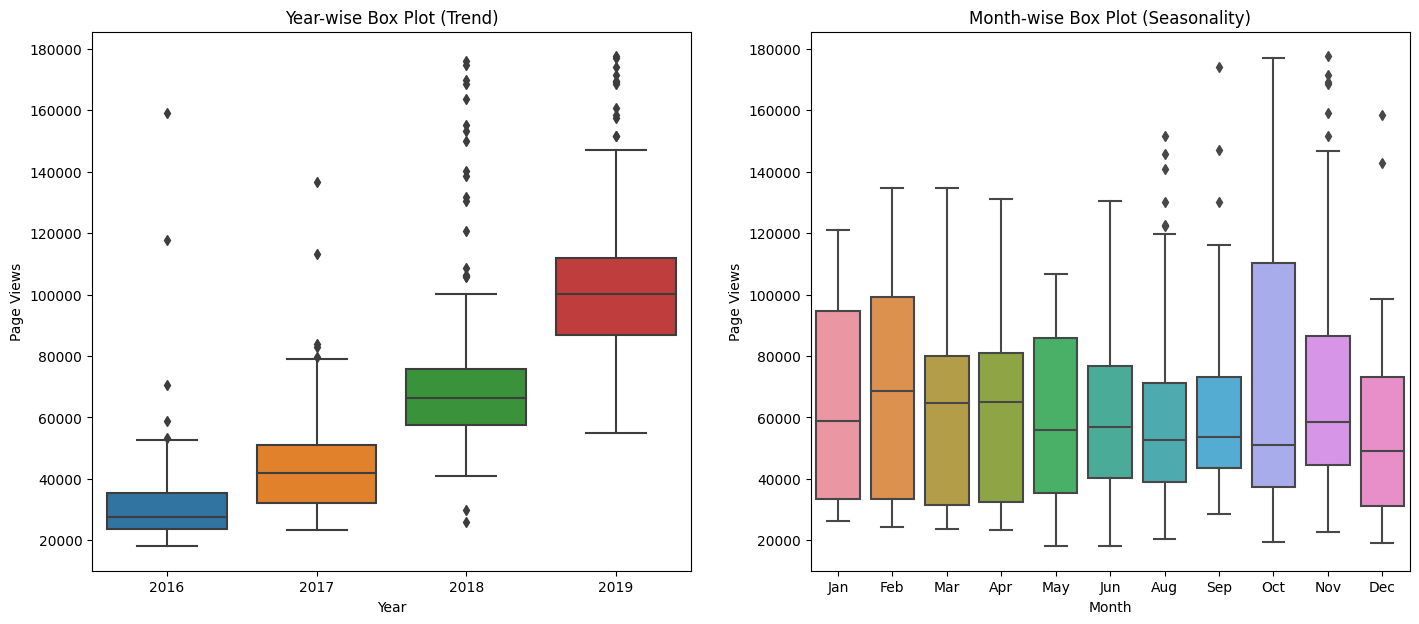

In [120]:
df_time_3 = df_time.copy()

df_time_3.reset_index(inplace=True)
df_time_3['year'] = [d.year for d in df_time_3.date]
df_time_3['month'] = [d.strftime('%b') for d in df_time_3.date]

fig_3, ax_3 = plt.subplots(1,2, figsize= (17,7))
sns.boxplot(ax=ax_3[0], data=df_time_3, x='year', y='value')
ax_3[0].set_xlabel('Year')
ax_3[0].set_ylabel('Page Views')
ax_3[0].set_title('Year-wise Box Plot (Trend)')

sns.boxplot(ax=ax_3[1], data=df_time_3, x='month', y='value', 
                    order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax_3[1].set_xlabel('Month')
ax_3[1].set_ylabel('Page Views')
ax_3[1].set_title('Month-wise Box Plot (Seasonality)')
